# ACTIVIDAD 5

### Integrantes:
- Ana Maria Uran Gonzalez
- Karen Lizeth Velásquez Moná

## Implementación de Algoritmos Genéticos


La Optimización se ha convertido en una herramienta fundamental para la toma decisiones, esta se enfoca en seleccionar la mejor opción que permita cumplir con los objetivos planteados los cuales están acompañados de una serie de condiciones o limitaciones propias del problema, buscando generar valores óptimos en pro de beneficiar una decisión, lo cual permitirá maximizar o minimizar el o los objetivos.

Basado en la dominancia, los algoritmos genéticos permiten generar n iteraciones sobre un problema hasta encontrar la mejor combinación que permita llegar al objetivo de manera óptima; sin embargo, estos algoritmos pueden optimizar un solo objetivo o múltiples objetivos.

El desarrollo de esta actividad permite ejecutar e identificar la optimización de un problema para múltiples objetivos, permitiendo así evidenciar a través de un diagrama de Pareto la manera como se maximiza un objetivo y se minimiza otro; es decir, como mientras un objetivo se beneficia el otro se perjudica; cuya solución será generada basado en el algoritmo genético NSGA II.

## II.	ALGORITMO NSGA II

El algoritmo NSGA-II (Elitist Non-Dominated Sorting Genetic Algorithm) fue propuesto por Deb en el año 2000.[2] Este es un algoritmo, busca optimizar problemas multi objetivo a través de una clasificación de acuerdo a un nivel de no dominación, permitiendo hallar un conjunto de soluciones óptimas (en gran medida conocidas como soluciones óptimas de Pareto), en lugar de una sola óptima solución.

Este algoritmo contiene unos pasos claves los cuales serán descritos a continuación:
1.	Definición de soluciones codificadas en forma binaria llamada (“Cromosomas”). [3]
2.	Crea una población de hijos (Q) a través de cruce y mutación.[3]
3.	Combina P y Q y puntúa para todos los objetivos.[3]
4.	Identifica el primer frente de Pareto (F1); es decir, todas las soluciones donde no hay otras soluciones que sean al menos igualmente buenas en todos los objetivos y mejores en al menos un objetivo. [3]
5.	Si F1 es mayor que la solución máxima permitida, reduzca el tamaño de F1 mediante "crowding selection”. .3]
6.	Si F1 es más pequeño que el tamaño de población requerido repita la selección de Pareto (después de eliminar el seleccionado ya seleccionado). Este nuevo conjunto de soluciones es F2. Si el número total de soluciones seleccionadas es mayor que el tamaño de población máximo permitido, reduzca el tamaño de solo la última selección (en este caso F2) para que el número de todas las soluciones seleccionadas sea igual al tamaño de población máximo permitido.[3]
7.	Repita la selección de Pareto hasta alcanzar el tamaño de población requerido (y luego reduzca el último frente de Pareto seleccionado mediante "selección de hacinamiento" según sea necesario para evitar exceder el tamaño de población máximo permitido). [3]
8.	Los frentes de Pareto seleccionados para la nueva población, P.
9.	Repita desde (2) durante el número requerido de generaciones o hasta que se alcance algún otro criterio de "detención".[3]
10.	Realice una selección final de Pareto para que la población final informada sea solo la del primer frente de Pareto.[3]


## APLICACIÓN

### Multi Objetivo

Actualmente una entidad bancaria busca generar optimización que permita maximizar la colocación de sus créditos y una minimización del riesgo de fraude. Para este caso cabe resaltar que en el sistema financiero la colocación de mayor número de créditos genera una exposición mayor al riesgo de fraude; sin embargo, se trabajara en este caso bajo este supuesto, ya que las entidades pueden tener herramientas alternas que permitan también mitigar los riesgos, por lo cual se hace la clarificación del supuesto con el que se partirá el ejercicio.

Una de las medidas que utiliza la industria para calcular la afectación que se da por fraude vs la generación de créditos corresponde a los puntos base, los cuales están estrechamente relacionados y permiten medir la proporción de los créditos colocaos vs la evolución del fraude:

De acuerdo con lo anterior y partiendo de un ejercicio académico se tiene un histórico de 1000 observaciones que contiene el número total de créditos colocados y los puntos base generados, así como los fraude generados y los puntos base asociados a este.

### Definición Objetivo 1
Minimizar el riesgo en cantidad de fraude

In [124]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Contamos con un histórico de transacciones de cantidad de transacciones de fraude y los puntos base asociado a ellos

In [162]:
Fraude = pd.read_csv('Fraude.csv',sep=';', encoding = 'UTF-8')

In [413]:
Fraude.head(100)

,Fraudes,PB
0,1037,43
1,791,91
2,1723,90
3,1730,62
4,1522,45
...,...,...
95,995,7
96,961,46
97,1866,7
98,892,54


Se realiza un análisis a través de regresión línea, utilizando como variable y los puntos base, cumpliendo la normalidad en los errores y R- Squared aceptable se genera la primera ecuación objetivo:

In [163]:
X2=Fraude.drop(['PB'],axis=1)

In [164]:
Y2=Fraude['PB']

In [168]:
model2 = sm.OLS(Y2, X2).fit()

In [2]:
# Definición de la función objetivo

In [169]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PB   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              2429.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):                   1.07e-269
Time:                        23:04:36   Log-Likelihood:                         -4877.1
No. Observations:                1000   AIC:                                      9756.
Df Residuals:                     999   BIC:                                      9761.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Fraudes        0.0375      0.001     49.281      0.000       0.036       0.039
==============================================================================
Omnibus:                       37.200   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.018
Skew:                          -0.034   Prob(JB):                     0.000202
Kurtosis:                       2.365   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
print ("Intercept = %s, Coefficients = %s" % (model2.params[0], model2.params[0:1]))

Intercept = 0.03753834814725727, Coefficients = Fraudes    0.037538
dtype: float64


#### Función objetivo 1

In [384]:
def objective1(x):
    y = -x*0.037538-0.03753834814725727
    return y

Nota: Símbolo negativo dado que se busca la minimización de estos casos

### Objetivo 2
Maximizar la cantidad de créditos colocados

Se cuenta con el histórico de los créditos colocados y los puntos base asociados a ellos

In [147]:
Creditos = pd.read_csv('Creditos.csv',sep=';', encoding = 'UTF-8')

In [409]:
Creditos.head()

,N_Creditos,PB
0,46.388,141
1,45.305,31
2,28.819,95
3,16.718,28
4,33.034,184


Se realiza un análisis a través de regresión línea, utilizando como variable y los puntos base, cumpliendo la normalidad en los errores y R- Squared aceptable se genera la primera ecuación objetivo:

In [148]:
X1=Creditos.drop(['PB'],axis=1)

In [149]:
Y=Creditos['PB']

In [139]:
import statsmodels.api as sm

In [150]:
model = sm.OLS(Y, X1).fit()

In [151]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PB   R-squared (uncentered):                   0.670
Model:                            OLS   Adj. R-squared (uncentered):              0.669
Method:                 Least Squares   F-statistic:                              2026.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):                   1.48e-242
Time:                        22:58:44   Log-Likelihood:                         -5642.8
No. Observations:                1000   AIC:                                  1.129e+04
Df Residuals:                     999   BIC:                                  1.129e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
N_Creditos     3.0145      0.067     45.008      0.000       2.883       3.146
==============================================================================
Omnibus:                       75.684   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.694
Skew:                           0.006   Prob(JB):                     2.63e-06
Kurtosis:                       2.215   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
print ("Intercept = %s, Coefficients = %s" % (model.params[0], model.params[0:1]))

Intercept = 3.0144963796183752, Coefficients = N_Creditos    3.014496
dtype: float64


#### Función objetivo 2

In [385]:
def objective2(x):
    
    y = x*3.014496+3.0144963796183752
    return y

#### Restricciones – parámetros iniciales:
•	Con el fin de realizar un exhaustivo estudio se tendrá una población igual a 150, los cuales serán la solución inicial.
•	Se permitirá al algoritmo generar máximo 501 iteraciones con el fin de que este genere combinaciones que permitan conocer a fondo el problema.
•	Se establecerá un mínimo valor igual a 10 el cual hace símil con los puntos base explicados y es el mínimo número que se espera.
•	Se establecerá un máximo valor igual a 1000 el cual hace símil con los puntos base explicados y es el mínimo número que se espera.


In [415]:
population = 150
max_gen = 501
min_value= 10
max_value= 1000

In [387]:
def index_locator(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

In [388]:

def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_locator(min(values),values) in list1:
            sorted_list.append(index_locator(min(values),values))
        values[index_locator(min(values),values)] = math.inf
    return sorted_list

#### Crowding distance
La distancia de crowing permite generar una medida de cercanía con respecto a otras soluciones, para este caso ya que para seleccionar soluciones se usará Pareto, es importante resaltar que todas las soluciones, están en un frente óptimo, donde se puede evidenciar el beneficio o no de una solución vs otra.

In [389]:

def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 9999999999999999
    distance[len(front) - 1] = 9999999999999999
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

#### Mutación:
Se define un % de mutación aleatorio, esto permite generar dinamismo dentro del algoritmo,


In [390]:

def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

In [392]:
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1:
        solution = min_value+(max_value-min_value)*random.random()
    return solution

In [393]:
def non_dominated_sorting_algorithm(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)
    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)
    del front[len(front)-1]
    return front

#### Selección de los no dominados

In [395]:
def non_dominated_sorting_algorithm(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)
    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)
    del front[len(front)-1]
    return front

#### Algoritmo

- Como se mencionaba en un principio el algoritmo partirá de un número ya determinado de generaciones y una población que aduce a las posibles soluciones.
- Una vez son analizadas las posibles soluciones en las dos funciones objetivos, el algoritmo realiza el cálculo de la no dominancia, para el cual si la posición i es comparada con otra posición se indicará la no dominancia y esta será guarda lista de los no dominados.
- Posteriormente se inicia con la creación de poblaciones y posibles soluciones donde se realiza los cálculos basado en las funciones preestablecidas, y nuevamente se realiza el análisis de la no dominancia, evaluando la distancia de crowding. 
- Estos procesos son realizados hasta encontrar el dominante o no dominando, para llevar al diagrama de Pareto,
- Una vez se realiza la ejecución del algoritmo podemos evidenciar que para cada generación el algoritmo se compara hasta con el número de población y inicia a establecer en cada generación la no dominancia.


In [327]:
def nsga2(population,max_gen,min_value,max_value):
    
    gen_no=0
    solution=[min_value+(max_value-min_value)*random.random() for i in range(0,population)]
    
    while(gen_no<max_gen):
        objective1_values = [objective1(solution[i])for i in range(0,population)]
        objective2_values = [objective2(solution[i])for i in range(0,population)]
        non_dominated_sorted_solution = non_dominated_sorting_algorithm(objective1_values[:],objective2_values[:])
        print('Best Front for Generation:',gen_no)
        for values in non_dominated_sorted_solution[0]:
            print(round(solution[values],3),end=" ")
        print("\n")
        crowding_distance_values=[]
        for i in range(0,len(non_dominated_sorted_solution)):
            crowding_distance_values.append(crowding_distance(objective1_values[:],objective2_values[:],non_dominated_sorted_solution[i][:]))
        solution2 = solution[:]
        
        while(len(solution2)!=2*population):
            a1 = random.randint(0,population-1)
            b1 = random.randint(0,population-1)
            solution2.append(crossover(solution[a1],solution[b1]))
        objective1_values2 = [objective1(solution2[i])for i in range(0,2*population)]
        objective2_values2 = [objective2(solution2[i])for i in range(0,2*population)]
        non_dominated_sorted_solution2 = non_dominated_sorting_algorithm(objective1_values2[:],objective2_values2[:])
        crowding_distance_values2=[]
        for i in range(0,len(non_dominated_sorted_solution2)):
            crowding_distance_values2.append(crowding_distance(objective1_values2[:],objective2_values2[:],non_dominated_sorted_solution2[i][:]))
        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_locator(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==population):
                    break
            if (len(new_solution) == population):
                break
        solution = [solution2[i] for i in new_solution]
        gen_no = gen_no + 1
    return [objective1_values, objective2_values]

In [422]:
def non_dominating_curve_plotter(objective1_values, objective2_values):
    plt.figure(figsize=(15,8))
    objective1 = [i * 1 for i in objective1_values]
    objective2 = [j * 1 for j in objective2_values]
    plt.xlabel('Objetivo 1 ', fontsize=15)
    plt.ylabel('Objetivo 2 ', fontsize=15)
    plt.scatter(objective1, objective2, c='blue', s=25)

### Ejecución

In [416]:
objective1_values, objective2_values = nsga2(population,max_gen,min_value,max_value)

Best Front for Generation: 0
439.157 389.799 703.658 58.645 139.793 417.008 692.47 637.486 757.834 625.012 501.92 388.61 297.0 693.606 509.341 474.317 912.945 220.327 851.447 308.635 67.117 753.065 396.437 45.505 730.008 208.989 288.237 843.37 937.476 769.454 277.835 588.707 431.794 993.094 464.275 763.655 172.013 256.078 267.379 649.801 118.277 975.485 142.123 838.064 604.122 469.323 423.744 823.188 427.244 963.729 788.783 46.654 155.202 506.324 633.119 320.701 354.09 543.337 708.903 667.063 80.069 559.253 282.439 388.996 65.93 943.496 959.878 890.612 382.466 674.518 135.062 825.08 58.456 11.788 345.381 627.112 412.264 535.705 200.092 160.624 801.419 932.017 926.636 823.072 442.092 222.463 683.015 534.236 121.483 644.169 174.038 994.584 470.726 173.804 613.78 201.024 402.431 80.77 391.884 622.316 488.215 179.04 851.859 414.062 912.356 462.631 247.866 794.75 28.701 362.319 870.416 765.314 232.21 512.346 548.631 928.596 792.25 87.917 414.188 901.119 915.613 344.381 427.155 701.656 786.5

## Resultado
Como resultado podemos observar en la línea azul los genes no dominados donde podemos evidenciar que cumple con el requerimiento inicial de nuestro problema, ya que es posible evidenciar que a medida que los fraude disminuyen la cantidad de colocación de créditos aumenta, observando los puntos óptimos para el ejercicio ya que se tiene en los extremos, que buscan resolver la maximización de la colocación de créditos mientras se disminuye el fraude


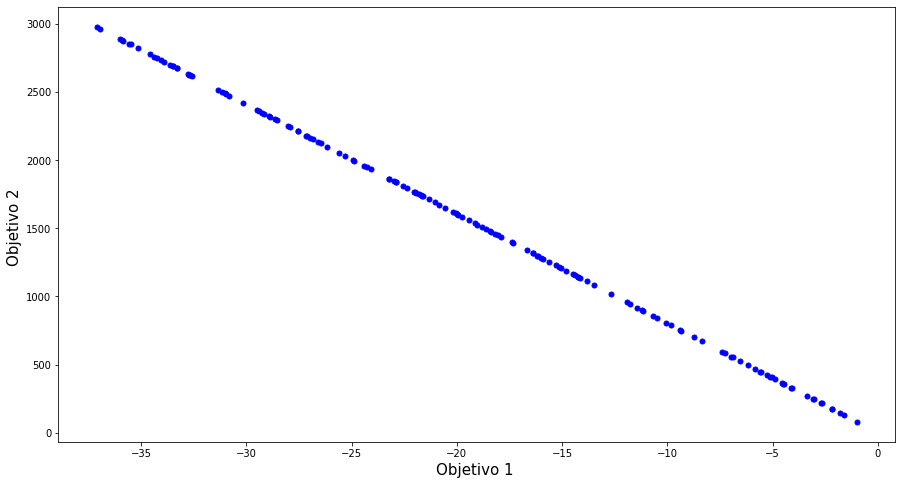

In [423]:
non_dominating_curve_plotter(objective1_values,objective2_values)